In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

## Challenge 1

In [2]:
turnstile1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
turnstile2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt")
turnstile3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt")

In [3]:
turnstile = pd.concat([turnstile1, turnstile2, turnstile3], axis = 0)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [4]:
turnstile.shape

(618374, 11)

In [5]:
turnstile.rename(columns = lambda x: x.strip(), inplace = True)

In [6]:
turnstile.reset_index(drop = True, inplace = True)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [7]:
turnstile['COMBINED_INDICES'] = list(zip(turnstile['C/A'], turnstile['UNIT'], turnstile['SCP'], turnstile['STATION']))

In [8]:
turnstile_dict = defaultdict(list)

In [9]:
for index, row in turnstile.iterrows():
    row_list = [row['LINENAME'], row['DIVISION'], row['DATE'], row['TIME'], row['DESC'], row['ENTRIES'], row['EXITS']]
    key = row['COMBINED_INDICES']
    turnstile_dict[key].append(row_list)

In [10]:
turnstile_dict[('A002','R051','02-00-00','59 ST')]

[['NQR456W', 'BMT', '06/22/2019', '00:00:00', 'REGULAR', 7107725, 2407457],
 ['NQR456W', 'BMT', '06/22/2019', '04:00:00', 'REGULAR', 7107738, 2407465],
 ['NQR456W', 'BMT', '06/22/2019', '08:00:00', 'REGULAR', 7107761, 2407491],
 ['NQR456W', 'BMT', '06/22/2019', '12:00:00', 'REGULAR', 7107858, 2407541],
 ['NQR456W', 'BMT', '06/22/2019', '16:00:00', 'REGULAR', 7108075, 2407581],
 ['NQR456W', 'BMT', '06/22/2019', '20:00:00', 'REGULAR', 7108333, 2407608],
 ['NQR456W', 'BMT', '06/23/2019', '00:00:00', 'REGULAR', 7108482, 2407628],
 ['NQR456W', 'BMT', '06/23/2019', '04:00:00', 'REGULAR', 7108500, 2407639],
 ['NQR456W', 'BMT', '06/23/2019', '08:00:00', 'REGULAR', 7108512, 2407655],
 ['NQR456W', 'BMT', '06/23/2019', '12:00:00', 'REGULAR', 7108584, 2407707],
 ['NQR456W', 'BMT', '06/23/2019', '16:00:00', 'REGULAR', 7108746, 2407746],
 ['NQR456W', 'BMT', '06/23/2019', '20:00:00', 'REGULAR', 7108973, 2407775],
 ['NQR456W', 'BMT', '06/24/2019', '00:00:00', 'REGULAR', 7109085, 2407809],
 ['NQR456W',

## Challenge 2

In [11]:
turnstile['DATETIME'] = pd.to_datetime(turnstile['DATE'] + " " + turnstile['TIME'])
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINED_INDICES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 16:00:00


In [12]:
turnstile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618374 entries, 0 to 618373
Data columns (total 13 columns):
C/A                 618374 non-null object
UNIT                618374 non-null object
SCP                 618374 non-null object
STATION             618374 non-null object
LINENAME            618374 non-null object
DIVISION            618374 non-null object
DATE                618374 non-null object
TIME                618374 non-null object
DESC                618374 non-null object
ENTRIES             618374 non-null int64
EXITS               618374 non-null int64
COMBINED_INDICES    618374 non-null object
DATETIME            618374 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 61.3+ MB


In [13]:
type(turnstile['DATETIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
turnstile_dict_timestamps = defaultdict(list)

In [15]:
for index, row in turnstile.iterrows():
    row_list = [row['DATETIME'], row['ENTRIES']]
    key = row['COMBINED_INDICES']
    turnstile_dict_timestamps[key].append(row_list)

In [16]:
turnstile_dict_timestamps[('A002','R051','02-00-00','59 ST')]

[[Timestamp('2019-06-22 00:00:00'), 7107725],
 [Timestamp('2019-06-22 04:00:00'), 7107738],
 [Timestamp('2019-06-22 08:00:00'), 7107761],
 [Timestamp('2019-06-22 12:00:00'), 7107858],
 [Timestamp('2019-06-22 16:00:00'), 7108075],
 [Timestamp('2019-06-22 20:00:00'), 7108333],
 [Timestamp('2019-06-23 00:00:00'), 7108482],
 [Timestamp('2019-06-23 04:00:00'), 7108500],
 [Timestamp('2019-06-23 08:00:00'), 7108512],
 [Timestamp('2019-06-23 12:00:00'), 7108584],
 [Timestamp('2019-06-23 16:00:00'), 7108746],
 [Timestamp('2019-06-23 20:00:00'), 7108973],
 [Timestamp('2019-06-24 00:00:00'), 7109085],
 [Timestamp('2019-06-24 04:00:00'), 7109093],
 [Timestamp('2019-06-24 08:00:00'), 7109129],
 [Timestamp('2019-06-24 12:00:00'), 7109278],
 [Timestamp('2019-06-24 16:00:00'), 7109596],
 [Timestamp('2019-06-24 20:00:00'), 7110324],
 [Timestamp('2019-06-25 00:00:00'), 7110532],
 [Timestamp('2019-06-25 04:00:00'), 7110551],
 [Timestamp('2019-06-25 08:00:00'), 7110588],
 [Timestamp('2019-06-25 12:00:00')

## Challenge 3

In [25]:
first1000 = turnstile.head(1000)

In [29]:
group_indices = ['COMBINED_INDICES', 'DATE', 'ENTRIES']

maxs = first1000[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(max)
mins = first1000[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(min)
maxs - mins

ENTRIES
COMBINED_INDICES                   DATE               
(A002, R051, 02-00-00, 59 ST)      06/22/2019      608
                                   06/23/2019      491
                                   06/24/2019     1239
                                   06/25/2019     1253
                                   06/26/2019     1385
                                   06/27/2019     1311
                                   06/28/2019     1330
(A002, R051, 02-00-01, 59 ST)      06/22/2019      586
                                   06/23/2019      435
                                   06/24/2019     1064
                                   06/25/2019     1100
                                   06/26/2019     1095
                                   06/27/2019     1117
                                   06/28/2019     1077
(A002, R051, 02-03-00, 59 ST)      06/22/2019      257
                                   06/23/2019      155
                                   06/24/2019      410
                                   06/25/2019      414
                                   06/26/2019      424
                                   06/27/2019      448
                                   06/28/2019      378
(A002, R051, 02-03-01, 59 ST)      06/22/2019      713
                                   06/23/2019      486
                                   06/24/2019     1026
                                   06/25/2019     1112
                                   06/26/2019     1041
                                   06/27/2019     1024
                                   06/28/2019      944
(A002, R051, 02-03-02, 59 ST)      06/22/2019      686
                                   06/23/2019      537
...                                                ...
(A006, R079, 00-03-02, 5 AV/59 ST) 06/26/2019     2354
                                   06/27/2019     2332
                                   06/28/2019     2073
(A007, R079, 01-05-00, 5 AV/59 ST) 06/22/2019        0
                                   06/23/2019        0
                                   06/24/2019        0
                                   06/25/2019        1
                                   06/26/2019        0
                                   06/27/2019        0
                                   06/28/2019        2
(A007, R079, 01-05-01, 5 AV/59 ST) 06/22/2019        0
                                   06/23/2019        0
                                   06/24/2019        0
                                   06/25/2019        0
                                   06/26/2019        0
                                   06/27/2019        0
                                   06/28/2019        0
(A007, R079, 01-06-00, 5 AV/59 ST) 06/22/2019      562
                                   06/23/2019      553
                                   06/24/2019      566
                                   06/25/2019      404
                                   06/26/2019      574
                                   06/27/2019      572
                                   06/28/2019      588
(A007, R079, 01-06-01, 5 AV/59 ST) 06/22/2019      780
                                   06/23/2019      671
                                   06/24/2019     1245
                                   06/25/2019     1314
                                   06/26/2019     1444
                                   06/27/2019      224

[167 rows x 1 columns]

In [31]:
group_indices = ['COMBINED_INDICES', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(min)
daily_difference = maxs - mins

In [33]:
daily_difference.head()

ENTRIES
COMBINED_INDICES              DATE               
(A002, R051, 02-00-00, 59 ST) 06/08/2019      652
                              06/09/2019      593
                              06/10/2019     1249
                              06/11/2019     1353
                              06/12/2019     1351

## Challenge 4

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
daily_difference.reset_index(inplace = True)
daily_difference.head()

,COMBINED_INDICES,DATE,ENTRIES
0,"(A002, R051, 02-00-00, 59 ST)",06/08/2019,652
1,"(A002, R051, 02-00-00, 59 ST)",06/09/2019,593
2,"(A002, R051, 02-00-00, 59 ST)",06/10/2019,1249
3,"(A002, R051, 02-00-00, 59 ST)",06/11/2019,1353
4,"(A002, R051, 02-00-00, 59 ST)",06/12/2019,1351


In [87]:
turnstile1 = daily_difference[daily_difference['COMBINED_INDICES'] == ('A002', 'R051', '02-00-00', '59 ST')]

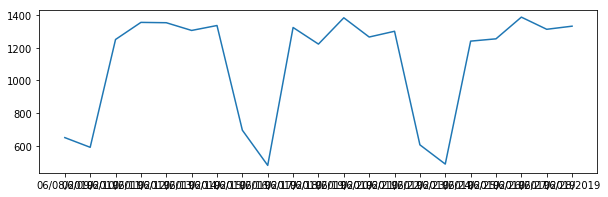

In [89]:
plt.figure(figsize=(10,3))
plt.plot(turnstile1['DATE'],turnstile1['ENTRIES']);

## Challenge 5

In [35]:
first1000.rename(index = str, columns = {"COMBINED_INDICES": "CA_UNIT_SCP_STATION"}, inplace = True)
turnstile.rename(index = str, columns = {"COMBINED_INDICES": "CA_UNIT_SCP_STATION"}, inplace = True)

/Users/alex/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [36]:
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,CA_UNIT_SCP_STATION,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 16:00:00


In [37]:
turnstile['CA_UNIT_STATION'] = list(zip(turnstile['C/A'], turnstile['UNIT'], turnstile['STATION']))
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,CA_UNIT_SCP_STATION,DATETIME,CA_UNIT_STATION
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 00:00:00,"(A002, R051, 59 ST)"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 04:00:00,"(A002, R051, 59 ST)"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 08:00:00,"(A002, R051, 59 ST)"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 12:00:00,"(A002, R051, 59 ST)"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,"(A002, R051, 02-00-00, 59 ST)",2019-06-22 16:00:00,"(A002, R051, 59 ST)"


In [38]:
group_indices = ['CA_UNIT_STATION', 'SCP', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['CA_UNIT_STATION', 'SCP', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['CA_UNIT_STATION', 'SCP', 'DATE']).agg(min)
daily_difference_scp = maxs - mins

In [41]:
daily_difference_scp.head()

ENTRIES
CA_UNIT_STATION     SCP      DATE               
(A002, R051, 59 ST) 02-00-00 06/08/2019      652
                             06/09/2019      593
                             06/10/2019     1249
                             06/11/2019     1353
                             06/12/2019     1351

In [71]:
daily_difference_scp.reset_index(inplace = True)

In [90]:
turnstile_groups = daily_difference_scp.groupby(by = ['CA_UNIT_STATION', 'DATE']).agg(sum)
turnstile_groups.head()

ENTRIES
CA_UNIT_STATION     DATE               
(A002, R051, 59 ST) 06/08/2019     6032
                    06/09/2019     5061
                    06/10/2019    10732
                    06/11/2019    11749
                    06/12/2019    11872

## Challenge 6

In [99]:
group_indices = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['STATION', 'UNIT', 'C/A', 'SCP', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['STATION', 'UNIT', 'C/A', 'SCP', 'DATE']).agg(min)
daily_net_per_turnstile = maxs - mins
daily_net_per_turnstile.loc[('59 ST', 'R051', 'A002', '02-00-00')].head()

,ENTRIES
DATE,
06/08/2019,652
06/09/2019,593
06/10/2019,1249
06/11/2019,1353
06/12/2019,1351


In [101]:
daily_net_per_turnstile.reset_index(inplace = True)
daily_net_per_turnstile.head()

,STATION,UNIT,C/A,SCP,DATE,ENTRIES
0,1 AV,R248,H007,00-00-00,06/08/2019,0
1,1 AV,R248,H007,00-00-00,06/09/2019,1
2,1 AV,R248,H007,00-00-00,06/10/2019,3315
3,1 AV,R248,H007,00-00-00,06/11/2019,3422
4,1 AV,R248,H007,00-00-00,06/12/2019,3496


In [102]:
group_indices = ['STATION', 'DATE', 'ENTRIES']

daily_net_per_station = daily_net_per_turnstile[group_indices].groupby(by = ['STATION', 'DATE']).agg(sum)
daily_net_per_station.head()

ENTRIES
STATION DATE               
1 AV    06/08/2019     5711
        06/09/2019     4386
        06/10/2019    16265
        06/11/2019    16790
        06/12/2019    17176

## Challenge 7

In [108]:
fiftyninth = daily_net_per_station.loc['59 ST'].reset_index()
fiftyninth.head()

,DATE,ENTRIES
0,06/08/2019,30142
1,06/09/2019,25999
2,06/10/2019,51160
3,06/11/2019,56042
4,06/12/2019,56169


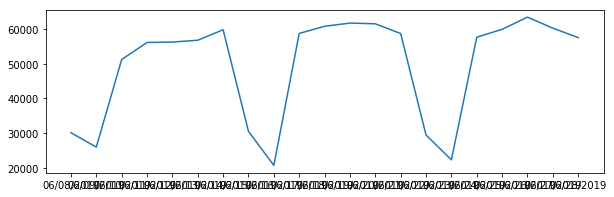

In [109]:
plt.figure(figsize=(10,3))
plt.plot(fiftyninth['DATE'],fiftyninth['ENTRIES']);

## Challenge 8

In [111]:
fiftyninth['DATE'] = pd.to_datetime(fiftyninth['DATE'])
fiftyninth.head()

,DATE,ENTRIES
0,2019-06-08,30142
1,2019-06-09,25999
2,2019-06-10,51160
3,2019-06-11,56042
4,2019-06-12,56169


In [118]:
[x.dayofweek for x in fiftyninth['DATE']]

[5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4]

In [126]:
import math
    
fiftyninth['WEEK'] = [math.floor(x/7) for x in fiftyninth.index]
fiftyninth.head()

,DATE,ENTRIES,WEEK
0,2019-06-08,30142,0
1,2019-06-09,25999,0
2,2019-06-10,51160,0
3,2019-06-11,56042,0
4,2019-06-12,56169,0


In [127]:
fiftyninth['DAY_OF_WEEK'] = [x%7 for x in fiftyninth.index]
fiftyninth.head()

,DATE,ENTRIES,WEEK,DAY_OF_WEEK
0,2019-06-08,30142,0,0
1,2019-06-09,25999,0,1
2,2019-06-10,51160,0,2
3,2019-06-11,56042,0,3
4,2019-06-12,56169,0,4


In [129]:
week0 = fiftyninth[fiftyninth['WEEK'] == 0]
week1 = fiftyninth[fiftyninth['WEEK'] == 1]
week2 = fiftyninth[fiftyninth['WEEK'] == 2]

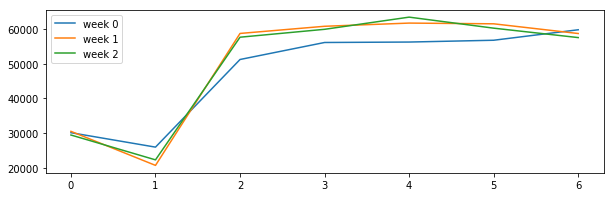

In [134]:
plt.figure(figsize=(10,3))
plt.plot(week0['DAY_OF_WEEK'],week0['ENTRIES'], label = 'week 0')
plt.plot(week1['DAY_OF_WEEK'],week1['ENTRIES'], label = 'week 1')
plt.plot(week2['DAY_OF_WEEK'],week2['ENTRIES'], label = 'week 2')
plt.legend();

#0 = Saturday
#6 = Friday

## Challenge 9

In [143]:
daily_net_per_station.reset_index(inplace = True)

In [151]:
q25, q50, q75 = np.nanpercentile(daily_net_per_station['ENTRIES'], [25, 50, 75])
print(q25, q50, q75)

3307.0 6585.0 14184.5


In [158]:
recover = daily_net_per_station

In [163]:
daily_net_per_station.loc[daily_net_per_station['ENTRIES'] > 200000, 'ENTRIES'] = q50
# Rows for daily net entries > 200,000 look completely bogus.
# Under 200,000 net entries the rows appear believable, i.e. multiple entries of 34 St Penn Station at ~150,000

In [167]:
station_totals = daily_net_per_station[['STATION', 'ENTRIES']].groupby(by = 'STATION').agg(sum)

In [170]:
station_totals.sort_values(by = 'ENTRIES', ascending = False).head(10)

,ENTRIES
STATION,
34 ST-PENN STA,2862976.0
GRD CNTRL-42 ST,2353875.0
34 ST-HERALD SQ,1993941.0
23 ST,1740181.0
42 ST-PORT AUTH,1677108.0
FULTON ST,1648301.0
TIMES SQ-42 ST,1610560.0
14 ST-UNION SQ,1591161.0
86 ST,1420066.0


## Challenge 10

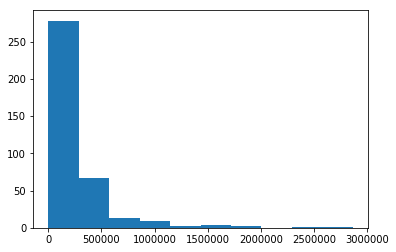

In [173]:
plt.hist(station_totals['ENTRIES']);